In [5]:
# !pip3 install -U scikit-image
!pip3 list | grep scikit

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
intel-scikit-learn (0.19.2)
scikit-image (0.15.0)
scikit-learn (0.19.2)


In [20]:
# https://scikit-image.org/docs/0.15.x/auto_examples/filters/plot_denoise_wavelet.html#sphx-glr-auto-examples-filters-plot-denoise-wavelet-py

In [19]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.measure import compare_psnr

original = img_as_float(data.chelsea()[100:250, 50:300])
print(original.shape)
print(original)

(150, 250, 3)
[[[0.6        0.44705882 0.3254902 ]
  [0.58431373 0.43137255 0.30980392]
  [0.56078431 0.4        0.29019608]
  ...
  [0.68235294 0.5372549  0.42352941]
  [0.70588235 0.56470588 0.43921569]
  [0.70980392 0.56862745 0.44313725]]

 [[0.57647059 0.43529412 0.30980392]
  [0.56470588 0.42352941 0.29803922]
  [0.56470588 0.41176471 0.29803922]
  ...
  [0.68235294 0.54509804 0.43529412]
  [0.67843137 0.53333333 0.41960784]
  [0.72156863 0.57647059 0.4627451 ]]

 [[0.56862745 0.41568627 0.28627451]
  [0.56862745 0.41568627 0.28627451]
  [0.57647059 0.42352941 0.30196078]
  ...
  [0.67843137 0.5372549  0.43529412]
  [0.6627451  0.51764706 0.40392157]
  [0.70980392 0.56470588 0.45098039]]

 ...

 [[0.68235294 0.55686275 0.50588235]
  [0.68627451 0.56078431 0.50980392]
  [0.68235294 0.55686275 0.50588235]
  ...
  [0.65882353 0.49803922 0.37254902]
  [0.65882353 0.49019608 0.35294118]
  [0.65098039 0.47843137 0.33333333]]

 [[0.6745098  0.56078431 0.50588235]
  [0.67058824 0.5529411

In [15]:
sigma = 0.12
noisy = random_noise(original, var=sigma**2)

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

im_bayes = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                           method='BayesShrink', mode='soft')
im_visushrink = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est)

# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  Repeat, specifying a reduction
# in the threshold by factors of 2 and 4.
im_visushrink2 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2)
im_visushrink4 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4)

# Compute PSNR as an indication of image quality
psnr_noisy = compare_psnr(original, noisy)
psnr_bayes = compare_psnr(original, im_bayes)
psnr_visushrink = compare_psnr(original, im_visushrink)
psnr_visushrink2 = compare_psnr(original, im_visushrink2)
psnr_visushrink4 = compare_psnr(original, im_visushrink4)

Estimated Gaussian noise standard deviation = 0.11668812428385152


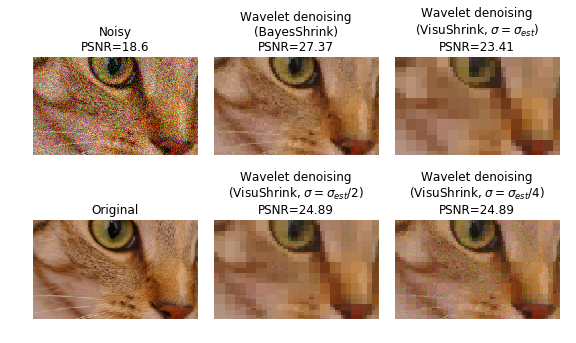

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy\nPSNR={:0.4g}'.format(psnr_noisy))
ax[0, 1].imshow(im_bayes)
ax[0, 1].axis('off')
ax[0, 1].set_title(
    'Wavelet denoising\n(BayesShrink)\nPSNR={:0.4g}'.format(psnr_bayes))
ax[0, 2].imshow(im_visushrink)
ax[0, 2].axis('off')
ax[0, 2].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}$)\n'
     'PSNR=%0.4g' % psnr_visushrink))
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(im_visushrink2)
ax[1, 1].axis('off')
ax[1, 1].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/2$)\n'
     'PSNR=%0.4g' % psnr_visushrink2))
ax[1, 2].imshow(im_visushrink4)
ax[1, 2].axis('off')
ax[1, 2].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink4))
fig.tight_layout()

plt.show()


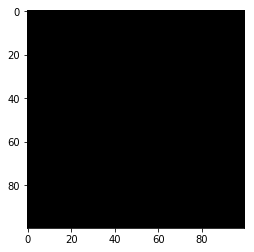

In [26]:
import numpy as np
tmp = np.zeros((100,100,3))
plt.imshow(tmp)

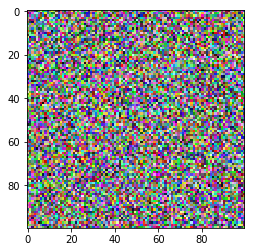

In [33]:
import numpy as np
tmp = np.random.rand(100,100,3)
plt.imshow(tmp)

In [37]:
tmp.shape

(100, 100, 3)

In [38]:
training_data = np.transpose(tmp, (2, 0, 1))

In [39]:
training_data.shape

(3, 100, 100)

In [40]:
tmp

array([[[0.78410381, 0.27013184, 0.72013054],
        [0.50866687, 0.49223775, 0.24543256],
        [0.55406541, 0.23860757, 0.4539022 ],
        ...,
        [0.35971366, 0.37843072, 0.2552818 ],
        [0.8304462 , 0.17449653, 0.82698793],
        [0.17614414, 0.39486194, 0.83542935]],

       [[0.62586202, 0.04834597, 0.24554231],
        [0.34906381, 0.11106923, 0.81176845],
        [0.99787664, 0.32587421, 0.87095237],
        ...,
        [0.06689049, 0.09544893, 0.52034054],
        [0.79442847, 0.26809974, 0.22466476],
        [0.95155438, 0.89041762, 0.63823042]],

       [[0.2258603 , 0.7117632 , 0.59431249],
        [0.76890425, 0.15731997, 0.70804033],
        [0.27439644, 0.6739511 , 0.72247947],
        ...,
        [0.51518122, 0.63491117, 0.29684981],
        [0.01861464, 0.49792087, 0.56846519],
        [0.40167541, 0.85815743, 0.09287113]],

       ...,

       [[0.2762118 , 0.69112295, 0.05737541],
        [0.81139538, 0.74910968, 0.85557844],
        [0.96300817, 0

In [41]:
training_data

array([[[0.78410381, 0.50866687, 0.55406541, ..., 0.35971366,
         0.8304462 , 0.17614414],
        [0.62586202, 0.34906381, 0.99787664, ..., 0.06689049,
         0.79442847, 0.95155438],
        [0.2258603 , 0.76890425, 0.27439644, ..., 0.51518122,
         0.01861464, 0.40167541],
        ...,
        [0.2762118 , 0.81139538, 0.96300817, ..., 0.34533216,
         0.39920381, 0.33015877],
        [0.80279694, 0.44954099, 0.56485233, ..., 0.9529141 ,
         0.90337434, 0.5656278 ],
        [0.44783187, 0.89609982, 0.22986229, ..., 0.13695679,
         0.10304245, 0.51747373]],

       [[0.27013184, 0.49223775, 0.23860757, ..., 0.37843072,
         0.17449653, 0.39486194],
        [0.04834597, 0.11106923, 0.32587421, ..., 0.09544893,
         0.26809974, 0.89041762],
        [0.7117632 , 0.15731997, 0.6739511 , ..., 0.63491117,
         0.49792087, 0.85815743],
        ...,
        [0.69112295, 0.74910968, 0.47027928, ..., 0.90751919,
         0.53653749, 0.08491056],
        [0.6

In [44]:
import torch